# **Servo Prediction using Linear Regression**

YBI Final Project Submission 
****
Name: Praisy Bestus

-------------

## **Objective**

The objective of the project "Servo Prediction using Linear Regression" is to develop a predictive model that can estimate or predict the behavior of a servo motor based on various input variables using linear regression.

A servo motor is a commonly used device in control systems, and its behavior is influenced by different factors such as input voltage, motor speed, and motor position. The project aims to analyze the relationship between these input variables and the resulting behavior of the servo motor.

By applying linear regression, the project seeks to create a mathematical model that can accurately predict the servo motor's behavior based on the given input variables. This model can be trained on a dataset containing historical data of servo motor behavior along with corresponding input values. The linear regression algorithm will identify patterns and relationships within the data to create a linear equation that represents the behavior of the servo motor.

Once the linear regression model is trained, it can be used to make predictions on new sets of input variables, providing an estimation of the servo motor's behavior. This prediction capability can be valuable for various applications, such as control systems, robotics, automation, and manufacturing, where accurate servo motor behavior prediction is crucial for system performance and optimization.








## **Data Source**

URL: https://raw.githubusercontent.com/ybifoundation/Dataset/main/Servo%20Mechanism.csv

## **Import Library**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [34]:
df=pd.read_csv("https://raw.githubusercontent.com/ybifoundation/Dataset/main/Servo%20Mechanism.csv")

## **Describe Data**

In [35]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [37]:
df.shape

(167, 5)

## **Data Visualization**

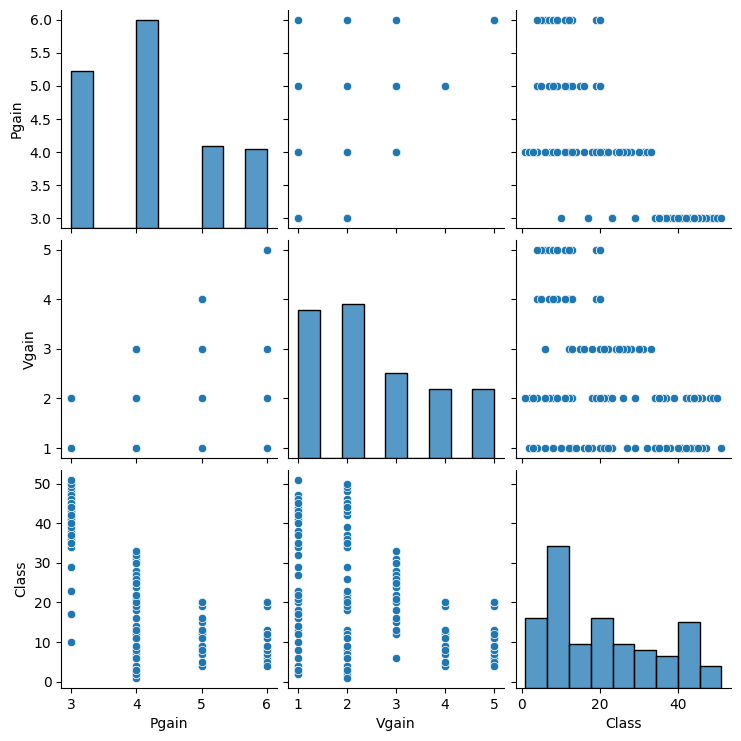

In [38]:
sns.pairplot(df)

## **Data Preprocessing**

In [39]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

## **Define Target Variable (y) and Feature Variables (X)**

In [40]:
df['Motor'].value_counts()

C    40
B    36
A    36
E    33
D    22
Name: Motor, dtype: int64

In [43]:
df['Screw'].value_counts()

0    42
1    35
2    31
3    30
4    29
Name: Screw, dtype: int64

In [41]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [42]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [44]:
X=df[['Motor','Screw','Pgain','Vgain']]
y=df['Class']

In [46]:
X=df.drop('Class',axis=1)

In [47]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Train Test Split**

In [48]:
import sklearn

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=2529)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

## **Model Training**

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
ln=LinearRegression()

In [54]:
ln.fit(X_train, y_train)

LinearRegression()

## **Prediction**

In [55]:
y_pred=ln.predict(X_test)

In [56]:
y_pred.shape

(51,)

In [57]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## **Model Evaluvation**

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [61]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [62]:
r2_score(y_test, y_pred)

0.6807245170563927

## **Explaination**

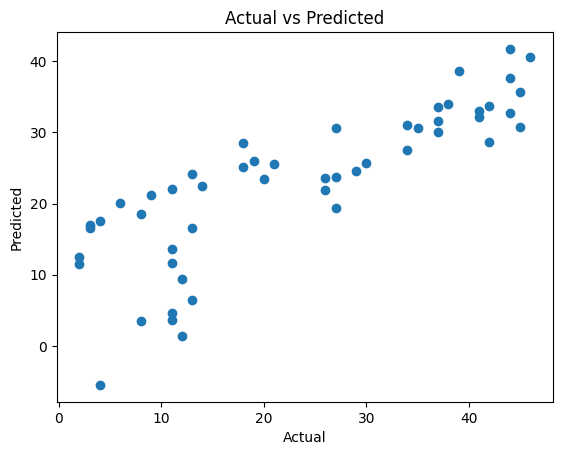

In [63]:
#Viz of Actual vs Predicted results
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

The methodology for the project "Servo Prediction using Linear Regression" typically involves the following steps:

Data Collection: Gather a dataset that includes observations of the servo motor's behavior and corresponding input variables. The dataset should contain a sufficient number of data points to capture the variability and relationships between the inputs and outputs.

Data Preprocessing: Clean and preprocess the collected data to ensure its quality and suitability for analysis. This step may involve handling missing values, removing outliers, and normalizing or scaling the data if necessary.

Feature Selection: Identify the relevant input variables (features) that have a significant impact on the servo motor's behavior. This step may involve exploratory data analysis and statistical techniques to determine the most influential features.

Splitting the Dataset: Divide the dataset into training and testing sets. The training set will be used to build the linear regression model, while the testing set will be used to evaluate the model's performance and generalization ability.

Model Training: Apply the linear regression algorithm to the training data. The algorithm will estimate the coefficients of the linear equation that best represents the relationship between the input variables and the servo motor's behavior. This process involves minimizing the sum of squared errors between the predicted and actual output values.

Model Evaluation: Evaluate the trained linear regression model using the testing dataset. Assess its performance metrics, such as mean squared error (MSE), root mean squared error (RMSE), and R-squared value, to measure how well the model fits the data and predicts the servo motor's behavior.

Prediction: Use the trained linear regression model to make predictions on new or unseen input variables. By applying the learned coefficients to the input values, the model can estimate the servo motor's behavior, such as position, speed, or other relevant metrics.

Model Optimization and Refinement: If the model's performance is not satisfactory, consider applying techniques such as feature engineering, regularization, or adjusting hyperparameters to improve the model's accuracy and generalization ability.

Deployment and Monitoring: Once the model has been optimized and validated, it can be deployed in real-world applications. Monitor the model's performance over time and retrain or update it as needed to maintain its accuracy and relevance.

It's important to note that the above methodology provides a general outline for the project. The specific implementation details may vary based on the requirements, available data, and the specific linear regression algorithm chosen for the task.





